**Table of contents**<a id='toc0_'></a>    
- [dataset merge function](#toc1_1_1_)    
    - [Combinining Dataset](#toc1_1_2_)    
  - [cleaning up dateset](#toc1_2_)    
    - [Sort and inverse DataFrame](#toc1_2_1_)    
    - [Plot values](#toc1_2_2_)    
    - [Drop index/periodDateUTC value](#toc1_2_3_)    
    - [duplicate values randomly](#toc1_2_4_)    
    - [check the correlation between features and unemployment](#toc1_2_5_)    
    - [check for correlation between all features](#toc1_2_6_)    
      - [find most correlted feature](#toc1_2_6_1_)    
      - [Variance Inflation Factor (VIF)](#toc1_2_6_2_)    
    - [Feature Selection](#toc1_2_7_)    
      - [Combine Feature which are highly correlated with each other from above figure](#toc1_2_7_1_)    
    - [Spliting data](#toc1_2_8_)    
    - [Linear Regression](#toc1_2_9_)    
    - [Multivariate Normality and Homoscedasticity](#toc1_2_10_)    
    - [r2 score and mean squared error](#toc1_2_11_)    
    - [Linear Regression - Univeriant](#toc1_2_12_)    
    - [SVR (Support Vector Regression)](#toc1_2_13_)    
    - [Random Forest Regression:](#toc1_2_14_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

from collections import Counter
from sklearn.metrics import mean_squared_error, mean_absolute_error

### <a id='toc1_1_1_'></a>[dataset merge function](#toc0_)

In [419]:
def getMergedDf(final_df, df, name):
    partial_df = df[['periodDateUtc', 'actual']]
    partial_df.rename(columns={'actual': name}, inplace=True)

    # Convert to datetime
    final_df['periodDateUtc'] = pd.to_datetime(final_df['periodDateUtc'], utc=True)
    partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)

    # # Get only year and month
    # final_df['periodDateUtc'] = final_df['periodDateUtc'].dt.strftime('%Y-%m-%d')
    # partial_df['periodDateUtc'] = partial_df['periodDateUtc'].dt.strftime('%Y-%m-%d')

    # # Drop duplicates in partial_df based on 'periodDateUtc' column
    # final_df.drop_duplicates(subset='periodDateUtc', keep='first', inplace=True)

    # # Perform the merge, avoiding duplicate rows based on 'periodDateUtc'
    # merged_df = final_df.merge(partial_df, on='periodDateUtc', how='outer')

    # Calculate time-based features
    final_df['year'] = final_df['periodDateUtc'].dt.year
    final_df['month'] = final_df['periodDateUtc'].dt.month
    partial_df['year'] = partial_df['periodDateUtc'].dt.year
    partial_df['month'] = partial_df['periodDateUtc'].dt.month

    # Merge the two dataframes
    merged_df = final_df.merge(partial_df, on=['year', 'month'], how='inner')

    # # Calculate the time difference between consecutive periods
    # merged_df['time_diff_days_x'] = merged_df['periodDateUtc_x'].diff().dt.days
    # merged_df['time_diff_days_y'] = merged_df['periodDateUtc_y'].diff().dt.days

    # merged_df['time_diff_days'] = (merged_df['periodDateUtc_y'] - merged_df['periodDateUtc_x']).dt.days

    # Assign the 'periodDateUtc_y' values to 'periodDateUtc' column
    merged_df['periodDateUtc'] = merged_df['periodDateUtc_y']

    # Drop unnecessary columns
    merged_df.drop(columns=['periodDateUtc_x', 'periodDateUtc_y', 'year', 'month'], inplace=True)


    merged_df.sort_values(by='periodDateUtc', inplace=True)
    # Reset the index if needed
    merged_df.reset_index(drop=True, inplace=True)

    return merged_df

### <a id='toc1_1_2_'></a>[Combinining Dataset](#toc0_)

In [540]:
# Read the JSON file into a pandas DataFrame
file_path = "./data/USD_Manufacturing_PMI.json"
ManufacturingPMI = pd.read_json(file_path)

file_path = "./data/USD_Unemployment_Rate.json"
UnemploymentRate = pd.read_json(file_path)

file_path = "./data/USD_Services_PMI.json"
ServicesPMI = pd.read_json(file_path)

file_path = "./data/USD - Industrial Production (MoM).json"
IndustrialProduction = pd.read_json(file_path)

file_path = "./data/USD - Average Hourly Earnings (MoM).json"
AverageHourlyEarnings = pd.read_json(file_path)

file_path = "./data/USD - Monthly Budget Statement.json"
MonthlyBudget = pd.read_json(file_path)

file_path = "./data/USD - OLTS Job Openings.json"
OLTSJobOpenings = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (MoM).json"
ProducerPriceIndex_FoodEnergyMoM = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (YoY).json"
ProducerPriceIndex_FoodEnergyYoY = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales (MoM).json"
RetailSales = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales Control Group.json"
RetailSalesControlGroup = pd.read_json(file_path)

file_path = "./data/USD - UoM 5-year Consumer Inflation Expectation.json"
ConsumerInflationExpectation = pd.read_json(file_path)

file_path = "./data/USD_ ISM_Manufacturing_Prices_Paid.json"
ManufacturingPricesPaid = pd.read_json(file_path)

file_path = "./data/USD_Composite_PMI.json"
CompositePMI = pd.read_json(file_path)

file_path = "./data/USD_Factory_Orders_MoM.json"
FactoryOrders = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_Employment_Index_ISM.json"
ManufacturingEmploymentIndex = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_New_Orders_Index_ISM.json"
ManufacturingNewOrdersIndex = pd.read_json(file_path)

file_path = "./data/USD_ISM_Manufacturing_PMI.json"
ISMManufacturing = pd.read_json(file_path)

file_path = "./data/USD - Interest Rate.json"
InterestRate = pd.read_json(file_path)

file_path = "./data/USD - Initial Jobless Claims.json"
InitialJoblessClaims = pd.read_json(file_path)

file_path = "./data/USD - Building Permits.json"
BuildingPermits = pd.read_json(file_path)

file_path = "./data/USD - Challenger Job Cuts.json"
JobCuts = pd.read_json(file_path)

file_path = "./data/USD - Core Personal Consumption Expenditures.json"
PersonalConsumption = pd.read_json(file_path)

file_path = "./data/USD - Gross Domestic Product Price.json"
DomesticProductPrice = pd.read_json(file_path)

file_path = "./data/USD - ISM Services PMI.json"
ISMServicesPMI = pd.read_json(file_path)


final_df = pd.DataFrame()

final_df["periodDateUtc"] = UnemploymentRate["periodDateUtc"]
final_df["unemployment"] = UnemploymentRate["actual"]

#comnine datasets
final_df = getMergedDf(final_df, InitialJoblessClaims, "InitialJoblessClaims")
final_df = getMergedDf(final_df, IndustrialProduction, "IndustrialProduction")
final_df = getMergedDf(final_df, AverageHourlyEarnings, "AverageHourlyEarnings")
final_df = getMergedDf(final_df, RetailSales, "RetailSales")
final_df = getMergedDf(final_df, ManufacturingNewOrdersIndex, "ManufacturingNewOrdersIndex")
final_df = getMergedDf(final_df, ISMManufacturing, "ISMManufacturing")

#clean interest rate and convert
InterestRate.drop('periodDateUtc', axis=1)
InterestRate['dateUtc'] = pd.to_datetime(InterestRate['dateUtc'], utc=True)
InterestRate['periodDateUtc'] = pd.to_datetime(InterestRate['dateUtc'].dt.strftime('%Y-%m-01'))
final_df = getMergedDf(final_df, InterestRate, "InterestRate")

# final_df = getMergedDf(final_df, ManufacturingPMI, "ManufacturingPMI")
# final_df = getMergedDf(final_df, ServicesPMI, "ServicesPMI")
# final_df = getMergedDf(final_df, ManufacturingPricesPaid, "ManufacturingPricesPaid")
# final_df = getMergedDf(final_df, CompositePMI, "CompositePMI")
# final_df = getMergedDf(final_df, FactoryOrders, "FactoryOrders")
# final_df = getMergedDf(final_df, ManufacturingEmploymentIndex, "ManufacturingEmploymentIndex")
# final_df = getMergedDf(final_df, PersonalConsumption, "PersonalConsumption")
# final_df = getMergedDf(final_df, DomesticProductPrice, "DomesticProductPrice")
# final_df = getMergedDf(final_df, ISMServicesPMI, "ISMServicesPMI")


# final_df = getMergedDf(final_df, MonthlyBudget, "MonthlyBudget")
# final_df = getMergedDf(final_df, OLTSJobOpenings, "OLTSJobOpenings")
# final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyMoM, "ProducerPriceIndex_FoodEnergyMoM")
# final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyYoY, "ProducerPriceIndex_FoodEnergyYoY")
# final_df = getMergedDf(final_df, RetailSalesControlGroup, "RetailSalesControlGroup")
# final_df = getMergedDf(final_df, ConsumerInflationExpectation, "ConsumerInflationExpectation")
# final_df = getMergedDf(final_df, BuildingPermits, "BuildingPermits")
# final_df = getMergedDf(final_df, JobCuts, "JobCuts")

# print(UnemploymentRate[["periodDateUtc","actual"]])
print(ISMManufacturing[["periodDateUtc","actual"]])
print(InterestRate[["periodDateUtc","actual"]])

final_df.tail(20)

            periodDateUtc  actual
0    2023-06-01T00:00:00Z    46.0
1    2023-05-01T00:00:00Z    46.9
2    2023-04-01T00:00:00Z    47.1
3    2023-03-01T00:00:00Z    46.3
4    2023-02-01T00:00:00Z    47.7
..                    ...     ...
192  2007-06-01T00:00:00Z    56.0
193  2007-05-01T00:00:00Z    55.0
194  2007-04-01T00:00:00Z    54.7
195  2007-03-01T00:00:00Z    50.9
196  2007-02-01T00:00:00Z    52.3

[197 rows x 2 columns]
    periodDateUtc  actual
0      2023-07-01    5.50
1      2023-06-01    5.25
2      2023-05-01    5.25
3      2023-03-01    5.00
4      2023-02-01    4.75
..            ...     ...
130    2007-09-01    4.75
131    2007-08-01    5.25
132    2007-06-01    5.25
133    2007-05-01    5.25
134    2006-06-01    5.25

[135 rows x 2 columns]


C:\Users\ACER\AppData\Local\Temp\ipykernel_33260\1526317469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df.rename(columns={'actual': name}, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_33260\1526317469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_33260\1526317469.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,unemployment,InitialJoblessClaims,IndustrialProduction,AverageHourlyEarnings,RetailSales,ManufacturingNewOrdersIndex,ISMManufacturing,InterestRate,periodDateUtc
557,3.5,225,-0.7,0.3,-1.1,48.4,48.4,4.50,2022-12-01 00:00:00+00:00
558,3.5,230,-0.7,0.3,-1.1,48.4,48.4,4.50,2022-12-01 00:00:00+00:00
559,3.6,196,0.0,0.2,-0.4,47.7,47.7,4.75,2023-02-01 00:00:00+00:00
560,3.6,192,0.0,0.2,-0.4,47.7,47.7,4.75,2023-02-01 00:00:00+00:00
561,3.6,194,0.0,0.2,-0.4,47.7,47.7,4.75,2023-02-01 00:00:00+00:00
562,3.6,190,0.0,0.2,-0.4,47.7,47.7,4.75,2023-02-01 00:00:00+00:00
563,3.5,198,0.4,0.3,-1.0,46.3,46.3,5.00,2023-03-01 00:00:00+00:00
564,3.5,191,0.4,0.3,-1.0,46.3,46.3,5.00,2023-03-01 00:00:00+00:00
565,3.5,192,0.4,0.3,-1.0,46.3,46.3,5.00,2023-03-01 00:00:00+00:00
566,3.5,228,0.4,0.3,-1.0,46.3,46.3,5.00,2023-03-01 00:00:00+00:00


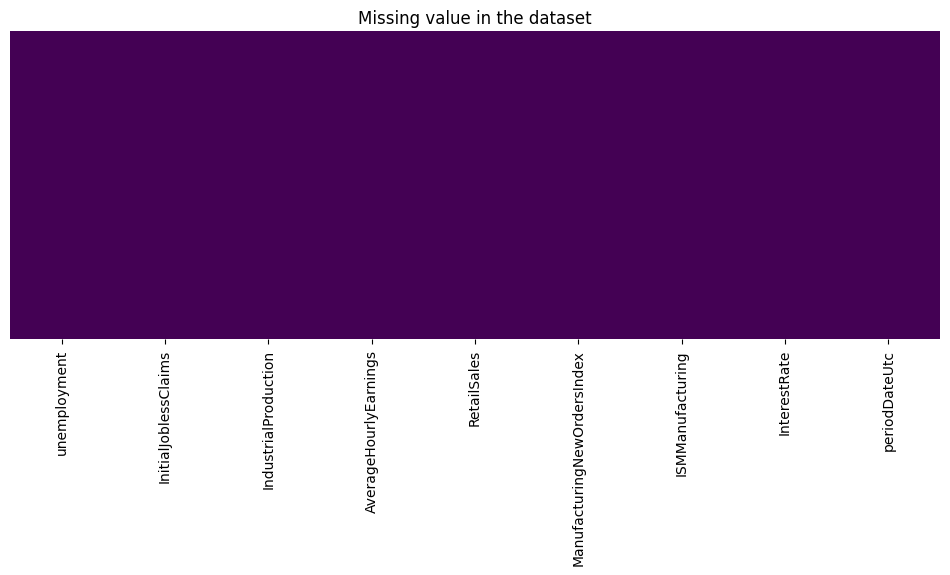

In [541]:
plt.figure(figsize=(12,4))
sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

## <a id='toc1_2_'></a>[cleaning up dateset](#toc0_)

In [542]:
#remove data i fperiodDataUTC is null
final_df = final_df.dropna(subset=['periodDateUtc']);

#first fill previous value if there is not a previous value fill 0
for column in final_df.columns:
    final_df[column].fillna(method="ffill", inplace=True)
    final_df[column].fillna(0, inplace=True)
    
print(final_df.head(10))

   unemployment  InitialJoblessClaims  IndustrialProduction  \
0           4.5                   311                   0.6   
1           4.5                   311                   0.6   
2           4.5                   324                   0.6   
3           4.5                   316                   0.6   
4           4.6                   325                   0.0   
5           4.6                   334                   0.0   
6           4.7                   320                   0.2   
7           4.7                   315                   0.2   
8           4.7                   301                   0.2   
9           4.7                   313                   0.2   

   AverageHourlyEarnings  RetailSales  ManufacturingNewOrdersIndex  \
0                    0.3         -0.7                         56.0   
1                    0.3         -0.7                         56.0   
2                    0.3         -0.7                         56.0   
3                    0.3  

### <a id='toc1_2_1_'></a>[Sort and inverse DataFrame](#toc0_)

In [543]:
# Reverse the order of the DataFrame to make it descending
final_df = final_df.iloc[::-1]

# Sort the DataFrame by 'periodDateUtc' in ascending order
final_df.sort_values(by='periodDateUtc', inplace=True)

# Reset the index if needed
final_df.reset_index(drop=True, inplace=True)

final_df

,unemployment,InitialJoblessClaims,IndustrialProduction,AverageHourlyEarnings,RetailSales,ManufacturingNewOrdersIndex,ISMManufacturing,InterestRate,periodDateUtc
0,4.5,311,0.6,0.3,-0.7,56.0,56.0,5.25,2007-06-01 00:00:00+00:00
1,4.5,316,0.6,0.3,-0.7,56.0,56.0,5.25,2007-06-01 00:00:00+00:00
2,4.5,311,0.6,0.3,-0.7,56.0,56.0,5.25,2007-06-01 00:00:00+00:00
3,4.5,324,0.6,0.3,-0.7,56.0,56.0,5.25,2007-06-01 00:00:00+00:00
4,4.6,325,0.0,0.3,0.3,52.9,52.9,5.25,2007-08-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...
572,3.6,261,-0.5,0.4,0.2,46.0,46.0,5.25,2023-06-01 00:00:00+00:00
573,3.6,262,-0.5,0.4,0.2,46.0,46.0,5.25,2023-06-01 00:00:00+00:00
574,3.6,264,-0.5,0.4,0.2,46.0,46.0,5.25,2023-06-01 00:00:00+00:00
575,3.6,239,-0.5,0.4,0.2,46.0,46.0,5.25,2023-06-01 00:00:00+00:00


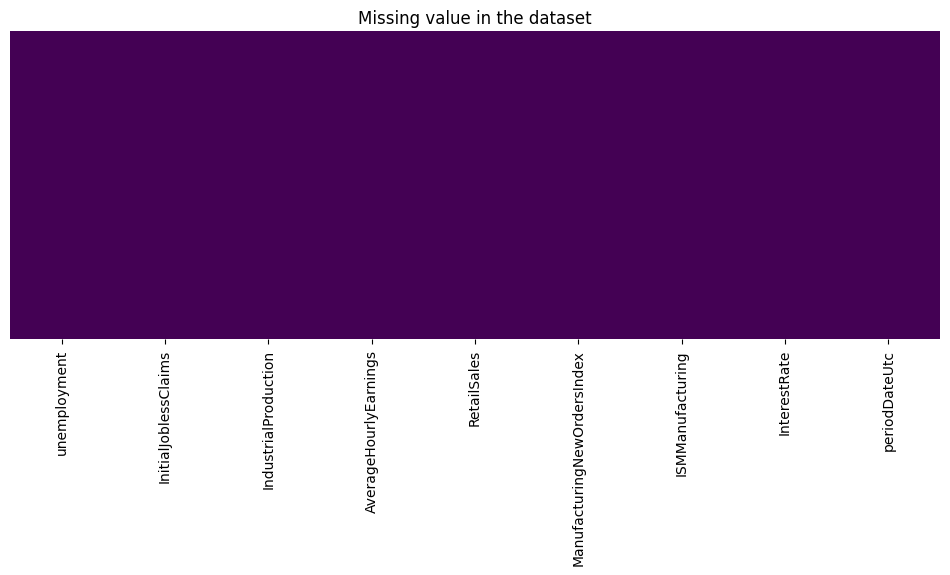

In [544]:
plt.figure(figsize=(12,4))
sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

### <a id='toc1_2_2_'></a>[Plot values](#toc0_)

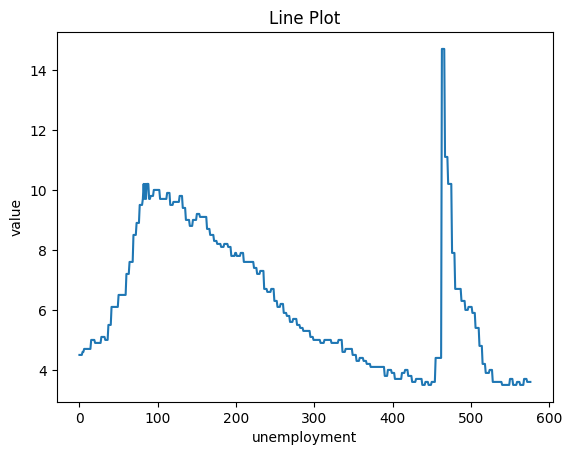

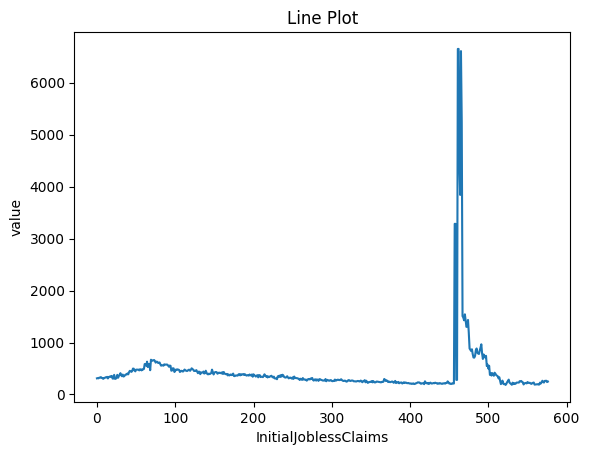

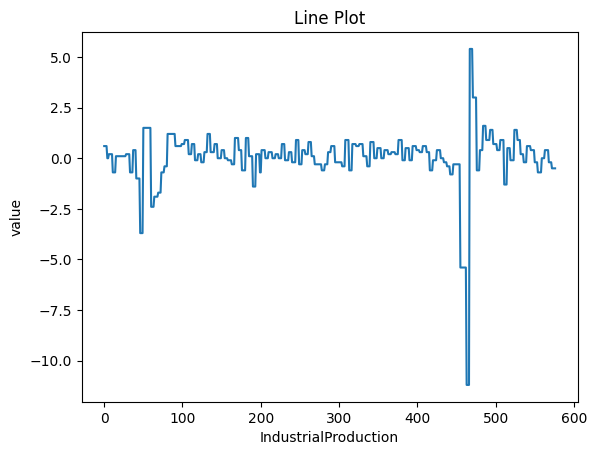

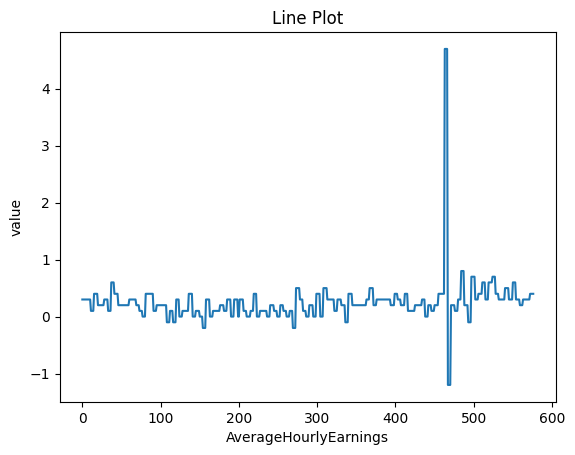

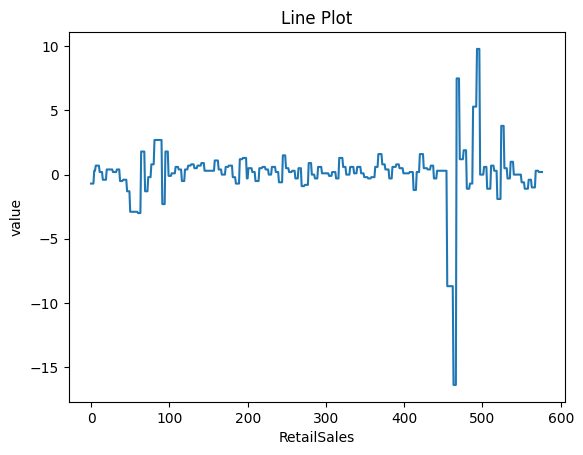

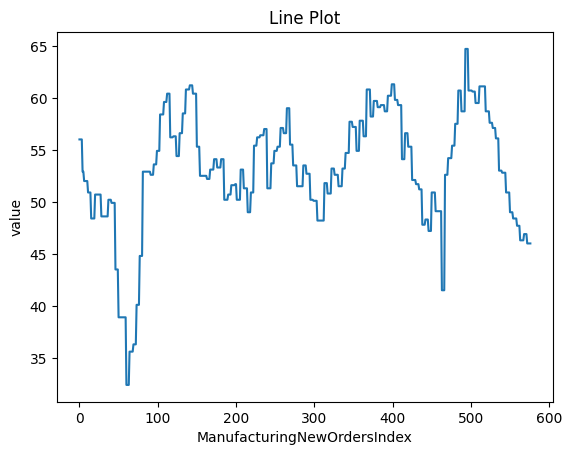

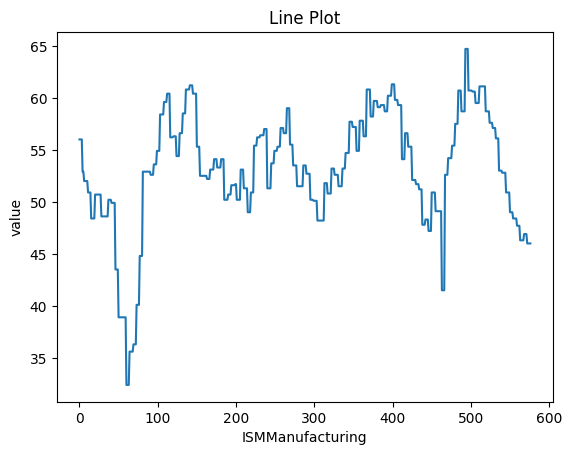

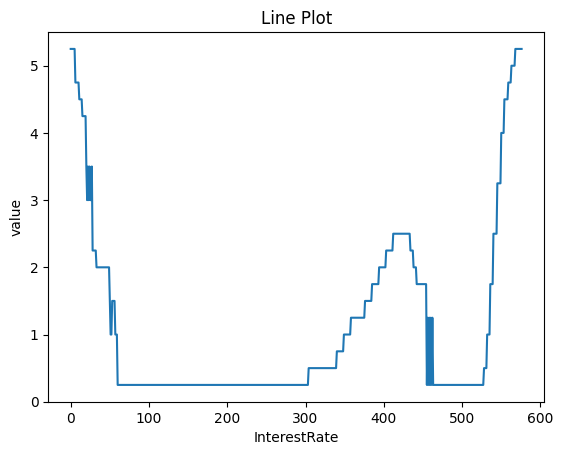

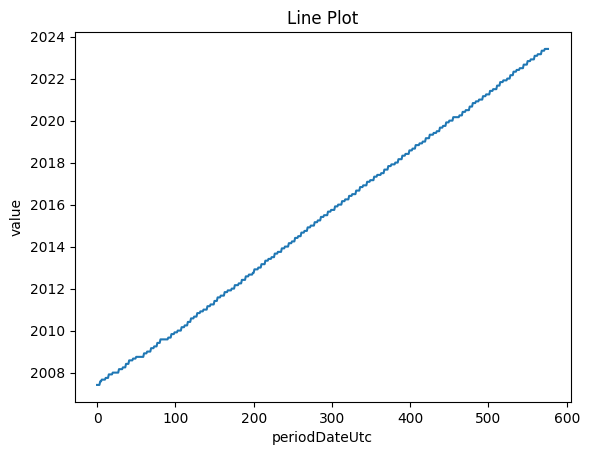

In [545]:

for column in final_df.columns:
    plt.plot(final_df.index, final_df[column], label=column)

    # plt.legend()
    # plt.tight_layout()  # Optional: Adjust the layout for better spacing
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
    plt.xlabel(column)
    plt.ylabel('value')
    plt.title('Line Plot')
    plt.show()

In [42]:
# from sklearn.ensemble import IsolationForest


# for column in final_df.columns:

#     plt.plot(final_df.index, final_df[column], c='red', label=column)

#     # Fit the IsolationForest model to detect outliers
#     outlier_detector = IsolationForest(contamination='auto', random_state=42)
#     outlier_detector.fit(final_df[[column]])

#     # Predict the outliers
#     final_df['is_outlier'] = outlier_detector.predict(final_df[[column]])

#     # Update the outlier values with a desired value (e.g., median)
#     median_value = final_df.loc[final_df['is_outlier'] == -1, column].median()
#     final_df.loc[final_df['is_outlier'] == -1, column] = median_value

#     # Remove the 'is_outlier' column since it's no longer needed
#     final_df.drop(columns='is_outlier', inplace=True)

#     plt.plot(final_df.index, final_df[column], c='blue', label=column+" updated")
#     plt.xlabel('Index')
#     plt.ylabel(column)
#     plt.title(column + ' with Outliers vs Updated')

#     plt.tight_layout()
#     plt.show()


### <a id='toc1_2_3_'></a>[Drop index/periodDateUTC value](#toc0_)

In [475]:
final_df = final_df.drop('periodDateUtc', axis=1)

### <a id='toc1_2_4_'></a>[duplicate values randomly](#toc0_)


duplicate values between rows without ramdom factor

### <a id='toc1_2_5_'></a>[check the correlation between features and unemployment](#toc0_)

The correlation coefficient ranges from -1 to 1:</br></br>

If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. </br>
If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease. </br>
If the correlation coefficient is close to 0, it indicates a weak or no linear correlation between the two variables.</br>

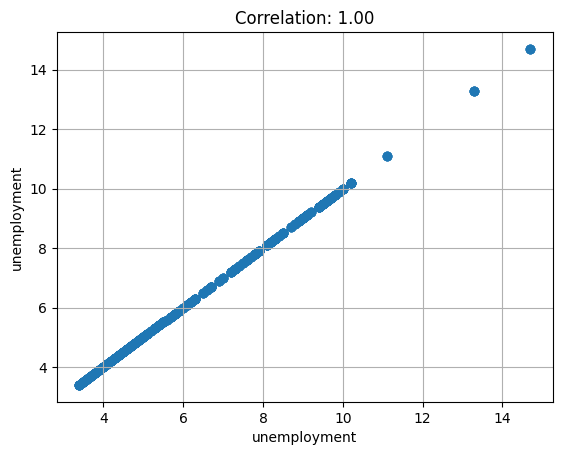

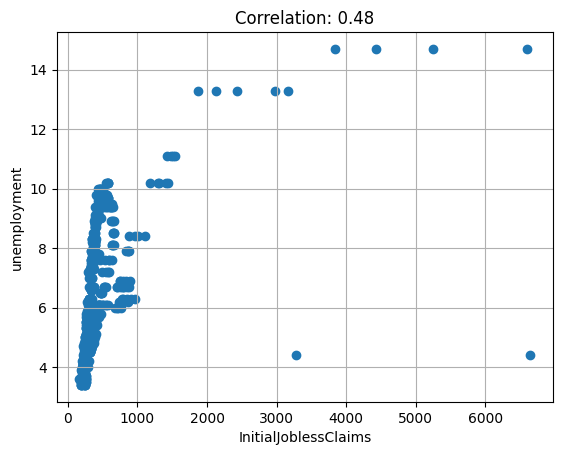

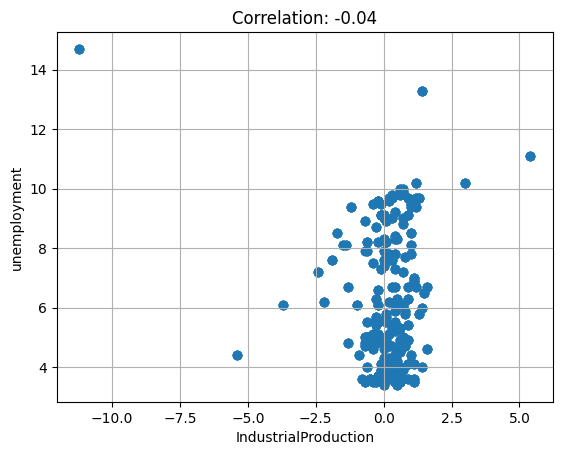

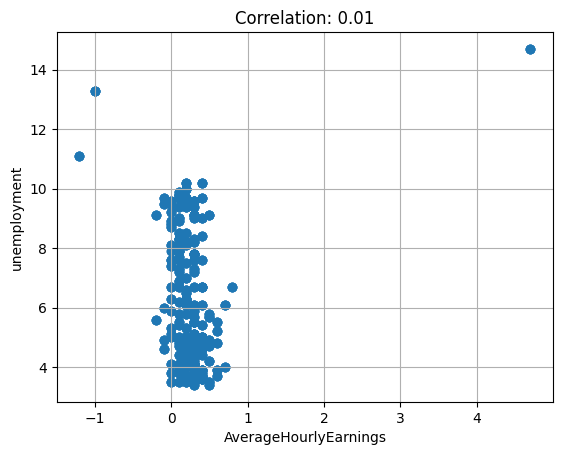

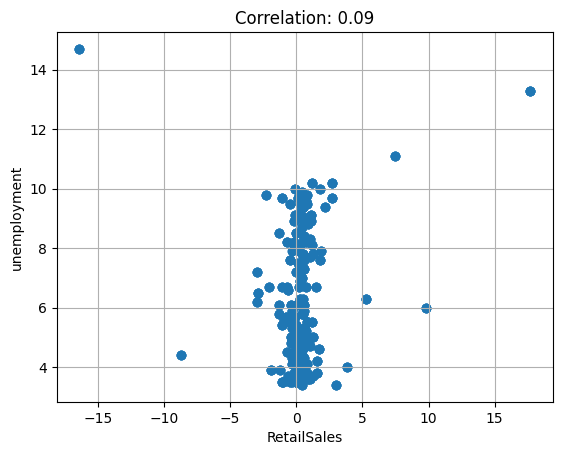

In [476]:
for column in final_df.columns:
    correlation = final_df[column].corr(final_df['unemployment'])

    # Plot a scatter plot to visualize the correlation
    plt.scatter(final_df[column], final_df['unemployment'])
    plt.xlabel(column)
    plt.ylabel('unemployment')
    plt.title(f'Correlation: {correlation:.2f}')
    plt.grid(True)
    plt.show()

### <a id='toc1_2_6_'></a>[check for correlation between all features](#toc0_)

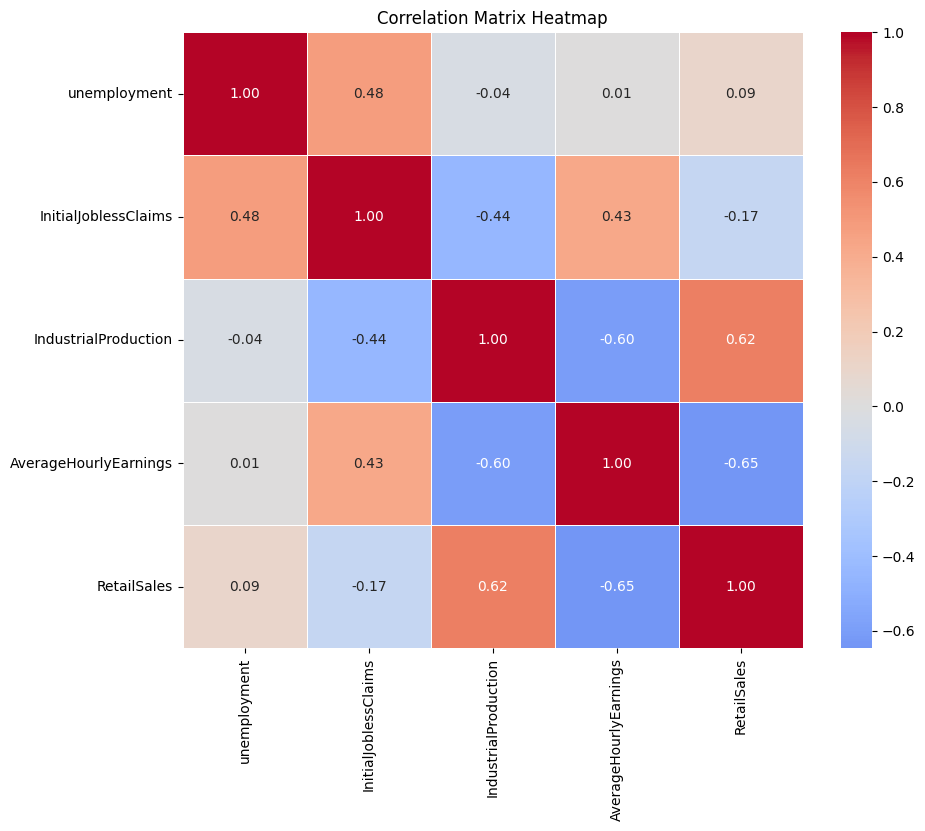

In [477]:
numeric_df = final_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### <a id='toc1_2_6_1_'></a>[find most correlted feature](#toc0_)

In [478]:
def getMulticollinearFeatures(df, threshold): 
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()

    # Select highly correlated features
    multicollinear_features = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                multicollinear_features.append(colname_i)
                multicollinear_features.append(colname_j)

    return multicollinear_features;

In [479]:
def plotMulticollinearFeatures(features):
    multicollinear_features = np.array(features)
    string_counts = Counter(multicollinear_features)

    sorted_string_counts = dict(sorted(string_counts.items(), key=lambda x: x[1], reverse=False))
    plt.figure(figsize=(8, 6))
    plt.bar(sorted_string_counts.keys(), sorted_string_counts.values())
    plt.xlabel('multicollinear features')
    plt.ylabel('Frequency')
    plt.title('Distribution of Strings by Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### <a id='toc1_2_6_2_'></a>[Variance Inflation Factor (VIF)](#toc0_)

<p>VIF is a metric that quantifies the extent of multicollinearity in a feature by measuring how much the variance of an estimated regression coefficient increases when that feature is added to the model. </br>
High VIF values (>5 or 10) suggest the presence of multicollinearity.</P>

In [480]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF(df): 
    # Calculate VIF for each feature
    vif = pd.DataFrame()
    numeric_df = df.select_dtypes(include='number')
    vif['Feature'] = numeric_df.columns
    vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

    print(vif)

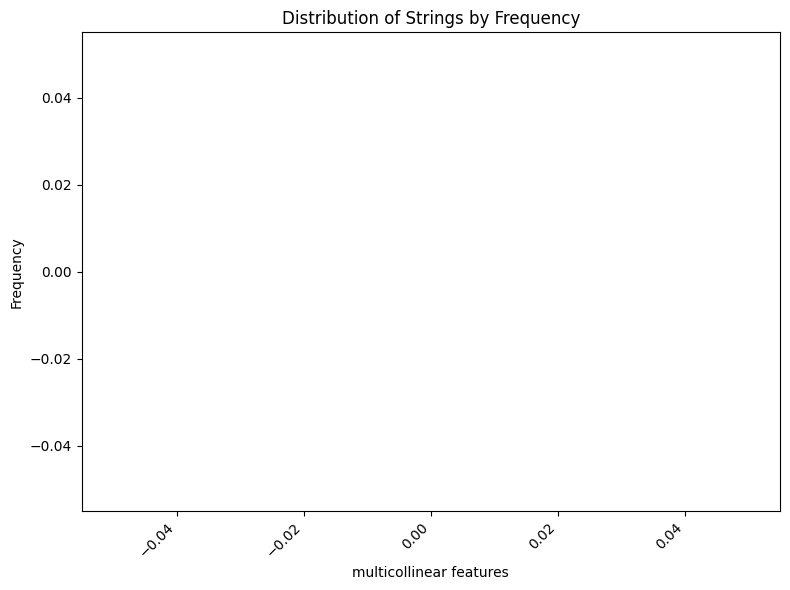

In [481]:
features = getMulticollinearFeatures(final_df, 0.7)
plotMulticollinearFeatures(features)


### <a id='toc1_2_7_'></a>[Feature Selection](#toc0_)

#### <a id='toc1_2_7_1_'></a>[Combine Feature which are highly correlated with each other from above figure](#toc0_)

In [482]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()

ManufacturingCols = ['ManufacturingPMI', 'ServicesPMI', 'CompositePMI', 'ISMServicesPMI']
#'ISMManufacturing', 'ManufacturingNewOrdersIndex', 'ManufacturingPricesPaid', 'ManufacturingEmploymentIndex',
X_std = scaler.fit_transform(final_df[ManufacturingCols])

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Add the reduced component as a new column in the DataFrame
final_df['PMI'] = X_pca

cleaned_df = final_df.drop(ManufacturingCols,axis=1) # Independet variable

features = getMulticollinearFeatures(cleaned_df, 0.7)
plotMulticollinearFeatures(features)

KeyError: "None of [Index(['ManufacturingPMI', 'ServicesPMI', 'CompositePMI', 'ISMServicesPMI'], dtype='object')] are in the [columns]"

In [483]:
getVIF(cleaned_df);

                         Feature         VIF
0                   unemployment   24.522774
1           IndustrialProduction    1.971473
2          AverageHourlyEarnings    3.831370
3                    RetailSales    1.166460
4        ManufacturingPricesPaid  191.293643
5                  FactoryOrders    2.593459
6   ManufacturingEmploymentIndex  275.498327
7    ManufacturingNewOrdersIndex         inf
8               ISMManufacturing         inf
9                   InterestRate    7.333328
10          InitialJoblessClaims    2.216761
11           PersonalConsumption    6.559083
12          DomesticProductPrice    3.122569
13                           PMI    2.191422


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [321]:
print(cleaned_df.describe())

       unemployment  IndustrialProduction  AverageHourlyEarnings  RetailSales  \
count   1276.000000           1276.000000            1276.000000  1276.000000   
mean       4.750157             -0.204781               0.264052     0.144201   
std        1.058934              0.865324               0.170986     1.042300   
min        3.400000            -11.200000              -1.200000   -16.400000   
25%        4.500000             -0.300000               0.300000     0.200000   
50%        4.500000             -0.300000               0.300000     0.200000   
75%        4.500000             -0.300000               0.300000     0.200000   
max       14.700000              5.400000               4.700000    17.700000   

       ManufacturingPricesPaid  FactoryOrders  ManufacturingEmploymentIndex  \
count              1276.000000    1276.000000                   1276.000000   
mean                 66.196395       0.757837                     54.274216   
std                   9.094313   

### <a id='toc1_2_8_'></a>[Spliting data](#toc0_)

In [501]:
from sklearn.model_selection import train_test_split
X = final_df.drop('unemployment',axis=1) # Independet variable
y = final_df['unemployment'] # dependent variable

print(X)

# # Initialize the SMOTE object
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Apply SMOTE to create synthetic samples for the minority class
# X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

     InitialJoblessClaims  IndustrialProduction  AverageHourlyEarnings  \
0                     311                   0.6                    0.3   
1                     316                   0.6                    0.3   
2                     311                   0.6                    0.3   
3                     324                   0.6                    0.3   
4                     318                   0.5                    0.3   
..                    ...                   ...                    ...   
826                   264                  -0.5                    0.4   
827                   239                  -0.5                    0.4   
828                   261                  -0.5                    0.4   
829                   262                  -0.5                    0.4   
830                   248                  -0.5                    0.4   

     RetailSales  
0           -0.7  
1           -0.7  
2           -0.7  
3           -0.7  
4            0.5

In [502]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [503]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

### <a id='toc1_2_9_'></a>[Linear Regression](#toc0_)

In [504]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,5.102593,5.102593
1,theta_1,InitialJoblessClaims,0.002586,0.002586
2,theta_2,IndustrialProduction,0.220837,0.220837
3,theta_3,AverageHourlyEarnings,-0.443163,-0.443163
4,theta_4,RetailSales,0.069329,0.069329


In [505]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  3.5059187709526682
R square obtain for normal equation method is : 0.30073794400658904


In [506]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  3.5059187709526727
R square obtain for scikit learn library is : 0.30073794400658826


C:\Users\ACER\AppData\Local\Temp\ipykernel_33260\3006966529.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


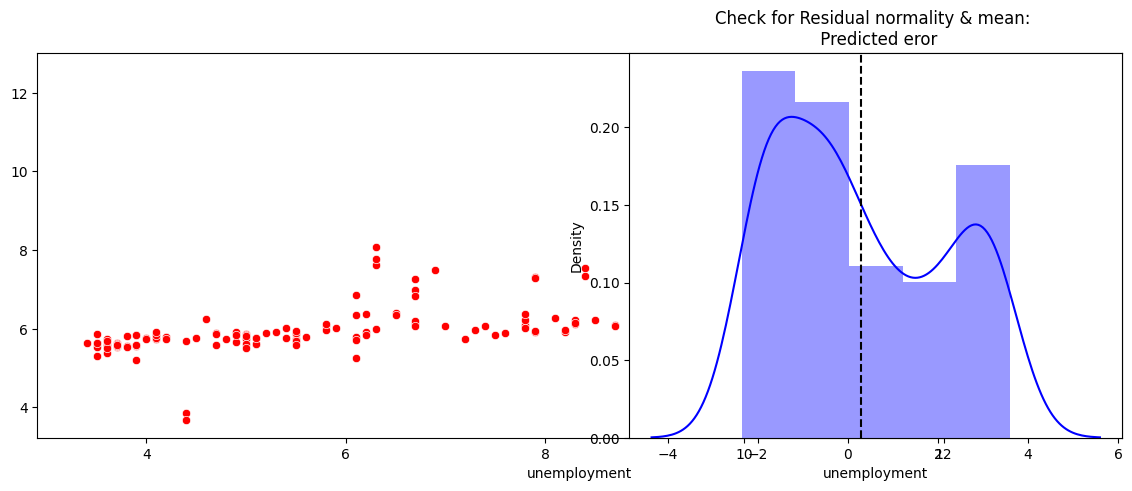

In [507]:
# Check for Linearity
f = plt.figure(figsize=(14,5))

# sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
sns.scatterplot(x=y_test,y=y_pred_sk, color='r')
# sns.scatterplot(data = ax, color='b')


# ax.set_title('Check for Linearity:\n Unemployed Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Predicted eror');

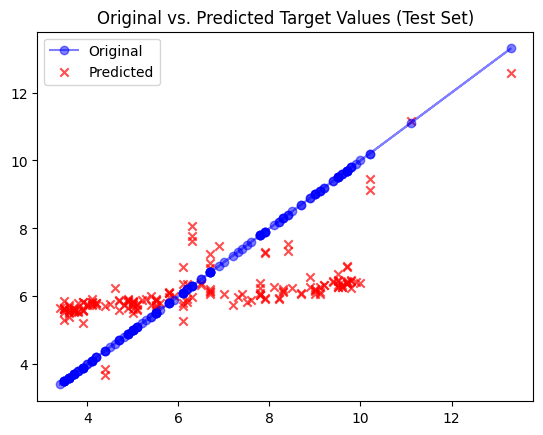

In [508]:
# Plot the original vs. predicted values for the test set
plt.plot(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, y_pred_sk, c='red', label='Predicted', marker='x', alpha=0.7)
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()

### <a id='toc1_2_10_'></a>[Multivariate Normality and Homoscedasticity](#toc0_)

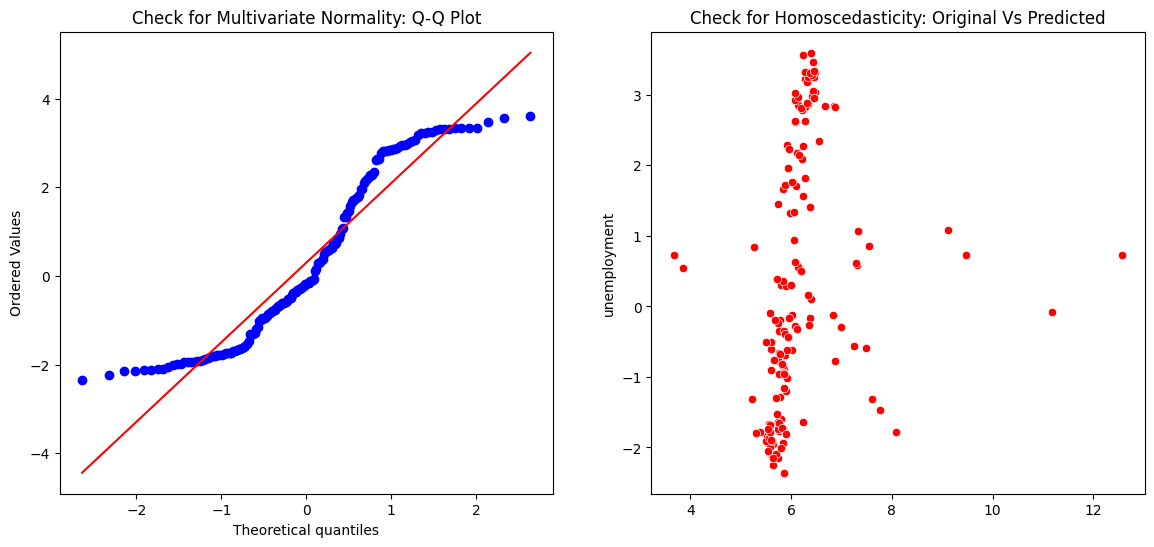

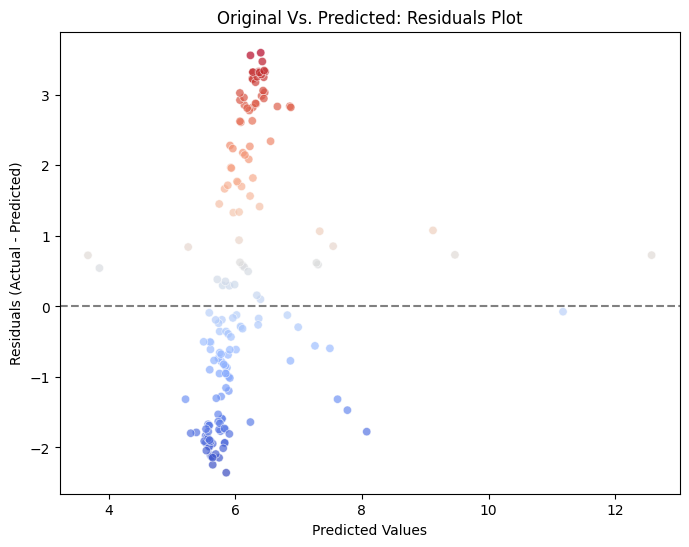

In [509]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: Q-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: Original Vs Predicted');

# Calculate the residuals
residuals = y_test - y_pred_sk

# Create the plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(y=residuals, x=y_pred_sk, hue=residuals, palette='coolwarm', alpha=0.7)
plt.axhline(0, color='gray', linestyle='dashed')  # Add a dashed line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Original Vs. Predicted: Residuals Plot')
plt.legend().set_visible(False)  # Hide the legend
plt.show()

In [510]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

1.4300790260660472

### <a id='toc1_2_11_'></a>[r2 score and mean squared error](#toc0_)

In [511]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have a separate test dataset X_test and y_test

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

residuals = abs((y_test - y_pred)/ y_test)

residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print("Mean of Residuals / Accouracy :", residual_mean*100)

R-squared: 0.30073794400658826
Mean Squared Error (MSE): 3.5059187709526727
Mean of Residuals / Accouracy : 26.474870387994194


### <a id='toc1_2_12_'></a>[Linear Regression - Univeriant](#toc0_)

In [513]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()

unemployment = final_df['unemployment']
uv_df = final_df.drop('unemployment',axis=1) # Independet variable
df_cols = uv_df.columns

X_std = scaler.fit_transform(final_df[df_cols])

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Add the reduced component as a new column in the DataFrame
univariant_df = pd.DataFrame()
univariant_df['target'] = unemployment
univariant_df['combined_feature'] = X_pca

# Step 5: Perform univariate linear regression to predict the 'target'
X = univariant_df['combined_feature'].values.reshape(-1, 1)
y = univariant_df['target'].values

In [514]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Perform univariate linear regression to predict the 'target'
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 7: Calculate the cost function (mean squared error) for the model's predictions on the test set.
predictions = regressor.predict(X_test)
cost_function = mean_squared_error(y_test, predictions)

print("Cost function (Mean Squared Error) on the test set:", cost_function)

Cost function (Mean Squared Error) on the test set: 5.2146333501626145


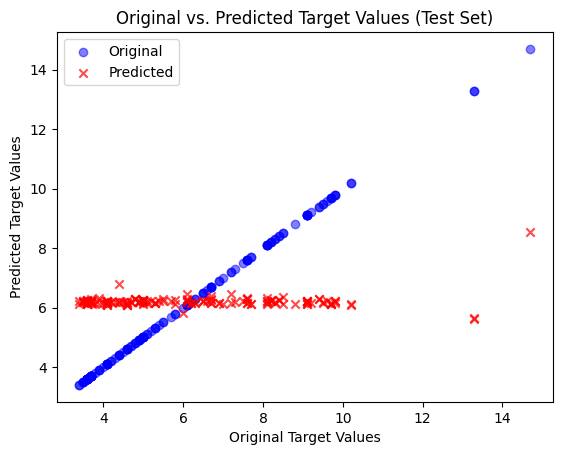

Mean of Residuals / Accouracy : 36.441631537501756
Standard Deviation of Residuals: 0.2272071545231721


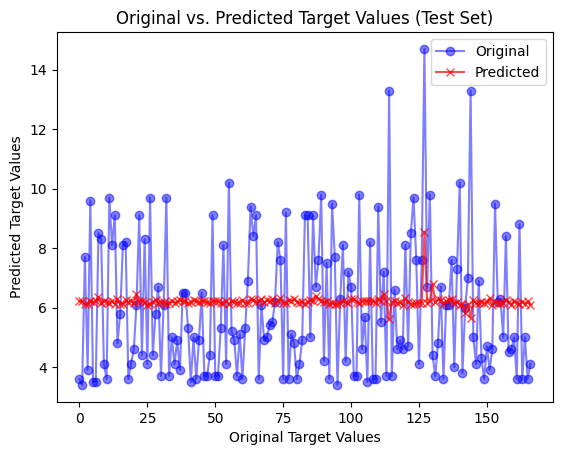

In [515]:
# Plot the original vs. predicted values for the test set
plt.scatter(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, predictions, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()


residuals = abs((y_test - predictions)/ y_test)

residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print("Mean of Residuals / Accouracy :", residual_mean*100)
print("Standard Deviation of Residuals:", residual_std)

# Plot the original vs. predicted values for the test set
plt.plot(y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.plot(predictions, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()


### <a id='toc1_2_13_'></a>[SVR (Support Vector Regression)](#toc0_)

In [518]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [519]:
# Standardize the features (optional but can improve model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R2): -0.030713061515212026
Mean Squared Error (MSE): 5.43401209802954


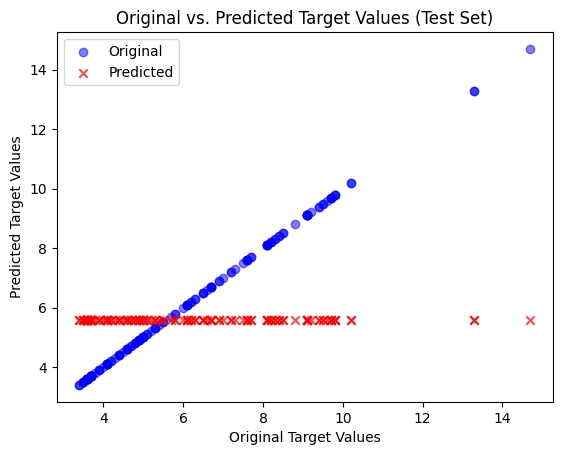

In [520]:
# Plot the original vs. predicted values for the test set
plt.scatter(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, y_pred, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()

### <a id='toc1_2_14_'></a>[Random Forest Regression:](#toc0_)

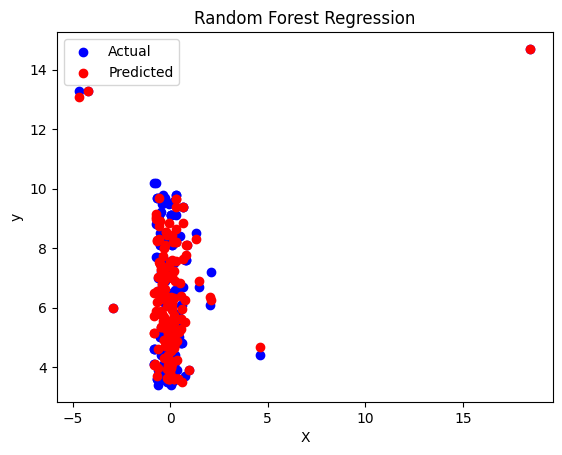

In [521]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
# We'll use 10 decision trees in the ensemble
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

Mean Squared Error: 3.801455688622754
Root Squared Error: 0.27894712776668584
Mean Absolute Error: 1.430119760479042
Mean of Residuals / Accouracy : 73.02644526108128


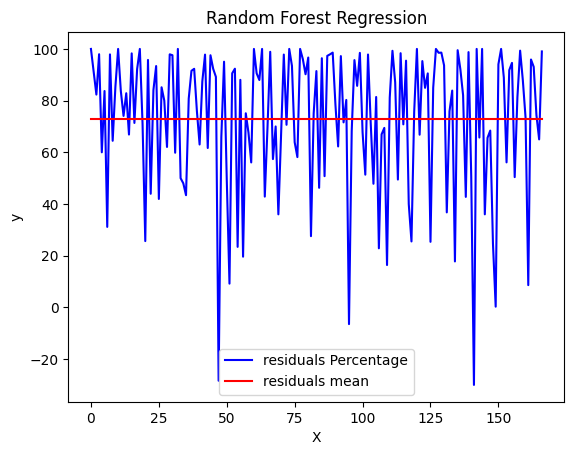

In [532]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)
print("Root Squared Error:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


accuracy = pd.DataFrame();
accuracy['test'] = y_test
accuracy['prediction'] = y_pred

residuals = 100 - abs((y_test - y_pred) * 100/ y_test)
accuracy['residuals_pct'] = residuals


residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

accuracy['residuals_mean'] = residual_mean
print("Mean of Residuals / Accouracy :", residual_mean)

# Plot the results
plt.plot(accuracy.index, accuracy['residuals_pct'], color='blue', label='residuals Percentage')
plt.plot(accuracy.index, accuracy['residuals_mean'], color='red', label='residuals mean')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regression')
plt.legend()
plt.show()


### Confusion Matrix